# Supervised Learning 
* Can be split into classification and regression

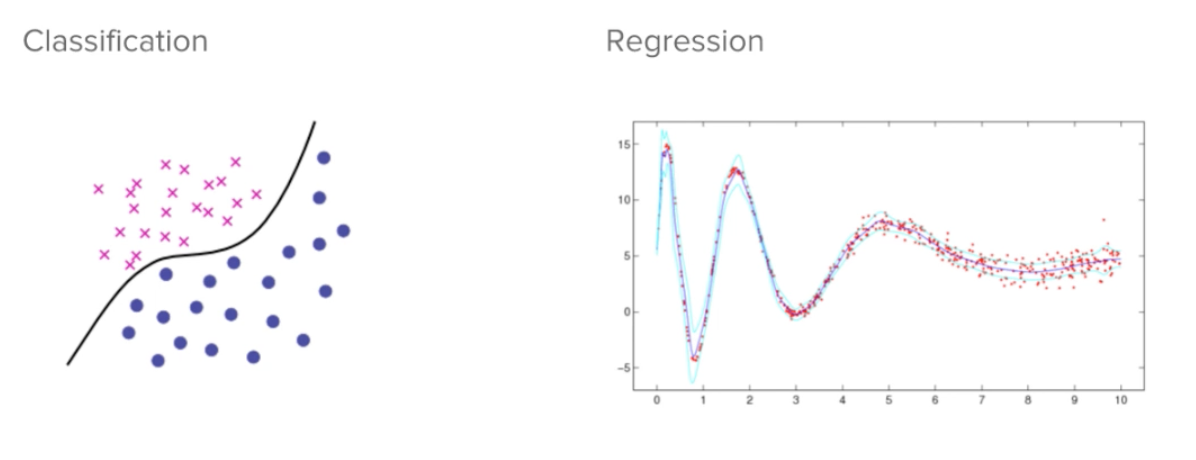

* In classification, you are trying to split the data into categories
* In regression, you are trying to predict the value of some function 

## Logistic Regression
* Oddly enough, despite its name, logistic regression is used for classification 
* Can be used in many different areas, such as digit and image classification 

# Logistic Regression in Python - Project
* We will do some practical data analysis throughout the course
* So you know exactly how the techniques you learn are used in a real-world scenario
* This data could have been derived from:
    * Excel spreadsheet
    * SQL Table
    * Log Files
    
## Project
> 
* Suppose you are a data scientist at an e-commerce store 
* We want to be able to predict user actions on our website
* This could have a *direct* monetary impact, because if you could say:
    * predict when someone was going to leave the site: **You could show them a prompt to not leave the site**
    * May be able to see which attributes of the site are weak and could be improved 
    * Or say your mobile experience is not very user friendly, by making a data driven decision, you could very accurately conclude that you need to enhance the mobile version of your site
    * We always want to make data driven decisions, and use science to improve your user experience  
    
## The Data
* In the form of a csv
* First line of the file is the header
    * **`Is_mobile`**: 0 or 1
    * **`N_products_viewed`**: integer > 0
    * **`Visit_duration`**: real number > 0
    * **`Is_returning_visitor`**: 0 or 1
    * **`Time_of_day`**: (0/1/2/3 = 24 hours split into 4 categories) 0 = 12 am to 6 am, 1 = 6 am to 12 pm, and so on. The assumption here is that users in the same bucket will behave similarly
    * **`User_action`**: bounce/add_to_cart/begin_checkout/finish_checkout
* **`User_action`** is what we will be trying to predict. 
* Because logistic regression can only be used in binary classification (Neural networks can be used in multi-class classification), we are only going to try to predict whether **`User_action`** will be **`bounce`** or **`add_to_cart`**

## Data Pre-processing
* Logistic regression/neural networks work on numerical vectors, not categories
* So we will want to use **one-hot encoding** 

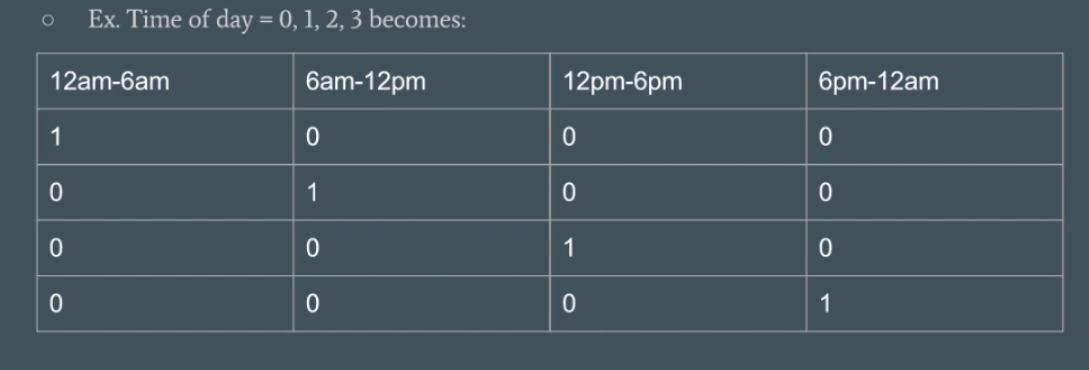

## Binary Categories
* You may ask, aren't is_mobile and is_returning_visitor also categories? 
* Yes they are, and we could technically turn them into two columns, but we don't necessarily need to 
* Remember: each weight tells us the effect of that weight being on. If we had an off column, the weight for that variable would tell us the effect for that variable being off 
* By not having an off column, we are basically absorbing the off effect into the bias term 

## Numerical Columns 
* these are **`N_products_viewed`** and **`Visit_duration`**
* The fact that **`N_products_viewed`** is an integer, means that technically we could treat it like a category, but it is more like a number on a scale, which itself has meaning! 
* we know that zero is closer to 1 than it is to 2: that has meaning
* we would expect that 1.5 would have the meaning "in between 1 and 2"
* For example, if all users who viewed 3 or fewer products didn't convert, and users who view 4+ products do convert, you would not expect users who viewed 2.5, or 0.1, or 0.5 to convert
* this shows that **scale** and **distance** are important 
* One simple way to treat numbers is to normalize them first (that means subtracting the mean and dividing by the standard deviation, leaving your column data to be centered around 0 (0 = mean) and 1 = standard deviation)
* Why do we want to put our numbers in this small range? 
* Because functions like the sigmoid function will have a more pronounced effect on them! 
* Think: sigmoid(10) ~= sigmoid(11) ~= sigmoid(12) ~= 0.999
* That isn't very useful, so we really want to normalize our data first

## Quick recap on sigmoid 

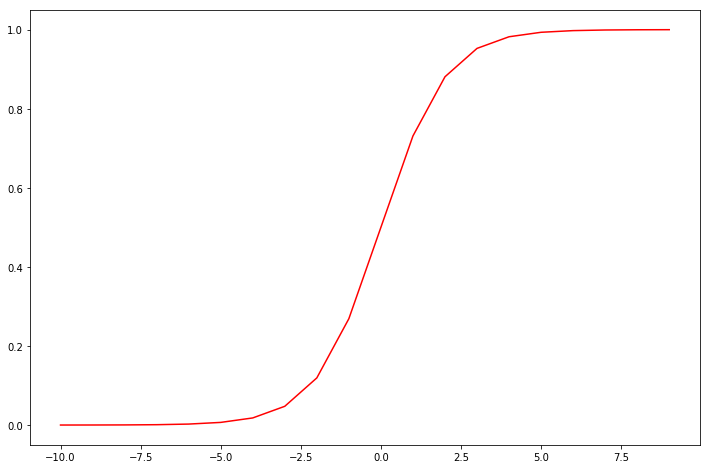

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

nums = np.arange(-10, 10, step=1)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(nums, sigmoid(nums), 'r')

From the example above, lets say our data is 10, 11, 12. That means that our mean is 11, and our std is 0.816. Lets take a look at the values the sigmoid outputs with no normalization, and once normalized.

In [13]:
# Not normalizing
print("Sigmoid of 10:", sigmoid(10))
print("Sigmoid of 11:", sigmoid(11))
print("Sigmoid of 12:", sigmoid(12))

# Normalization
mean = np.mean([10,11,12])
std = np.std([10,11,12])

print("Sigmoid of 10 after normalization:", sigmoid((10-mean)/std))
print("Sigmoid of 11 after normalization:", sigmoid((11-mean)/std))
print("Sigmoid of 12 after normalization:", sigmoid((12-mean)/std))

Sigmoid of 10: 0.999954602131
Sigmoid of 11: 0.999983298578
Sigmoid of 12: 0.999993855825
Sigmoid of 10 after normalization: 0.227102519436
Sigmoid of 11 after normalization: 0.5
Sigmoid of 12 after normalization: 0.772897480564


Clearly we can see that normalizing our data makes the output of the sigmoid function much more useful!

## Integration with the course
* Each supervised machine learning model typically has two main tasks
    * **Prediction**: That is taking the input, and accurately trying to compute the output
    * **Training**: How do you alter the weights of the model, so that you can accurately compute the output
* each of these tasks has a corresponding section in this folder 

### Prediction
* First we will go over prediction: aka how to get output from your model
* So once we have learned all of the theory for how to do that, we will return to this e commerce example, create a model, and attempt to make predictions from it

### Training
* The next section will focus on the training 
* how can we train this model so that it actually makes accurate predictions, and how accurate can we get 
* Once we have learned all of the theory behind training, we will return to this e commerce example and train the model to see how accurate we can get it 